# What is Cypher?

Cypher is a graph query language that is used to query the Neo4j Database. Just like you use SQL to query a MySQL database, you would use Cypher to query the Neo4j Database.

```cypher
MATCH(pokemon:Pokemon)-[isType:IS_TYPE]->(type) return pokemon,isType, type
```
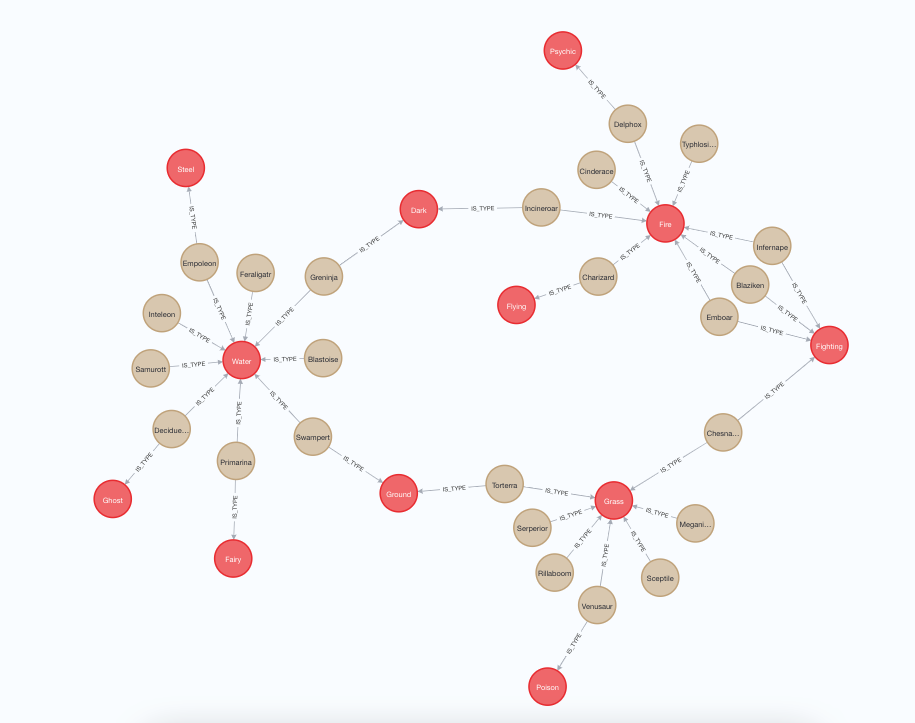

# Basic Building Blocks
- Nodes: They are entities equivalent to rows in table.
- Relationship: It connects entities and structure domain.
- Properties: It contains meta-data and attributes.
- Labels: It groups nodes by role.

# Install the neo4j-driver

In [25]:
!pip install neo4j-driver

## Connect a Database

In [26]:
from neo4j import GraphDatabase, basic_auth

driver = GraphDatabase.driver(
  "bolt://localhost:7687", 
  auth=basic_auth("neo4j", "test"))


## Create a new Pokemon with its relationship

In [27]:
cypher_query = '''
MATCH (r:Origin {name: 'Kanto'})
MATCH (t:Type {name: 'Grass'})
CREATE (p: Pokemon {name : 'Bulbasaur'})
MERGE (p)-[:IS_FROM]->(r)
MERGE (p)-[:IS_TYPE]->(t)
return p.name as name, r.name as region, collect(t) as type
'''

with driver.session(database="neo4j") as session:
    results = session.write_transaction(lambda tx: tx.run(cypher_query).data())

    for record in results:
        print(record)

driver.close()

{'name': 'Bulbasaur', 'region': 'Kanto', 'type': [{'name': 'Grass'}]}


## Retrieve All Pokemons and its relationship

In [29]:
cypher_query = '''
MATCH (p)-[:IS_FROM]->(r)
MATCH (p)-[:IS_TYPE]->(t)
return p.name as name, r.name as region, collect(t) as types
ORDER BY p.name
'''

with driver.session(database="neo4j") as session:
  results = session.read_transaction(
    lambda tx: tx.run(cypher_query).data())

  for record in results:
    print(record)

driver.close()

{'name': 'Blastoise', 'region': 'Kanto', 'types': [{'name': 'Water'}]}
{'name': 'Blaziken', 'region': 'Hoenn', 'types': [{'name': 'Fighting'}, {'name': 'Fire'}]}
{'name': 'Bulbasaur', 'region': 'Kanto', 'types': [{'name': 'Grass'}]}
{'name': 'Charizard', 'region': 'Kanto', 'types': [{'name': 'Flying'}, {'name': 'Fire'}]}
{'name': 'Chesnaught', 'region': 'Kalos', 'types': [{'name': 'Grass'}, {'name': 'Fighting'}]}
{'name': 'Cinderace', 'region': 'Galar', 'types': [{'name': 'Fire'}]}
{'name': 'Decidueye', 'region': 'Alola', 'types': [{'name': 'Ghost'}, {'name': 'Water'}]}
{'name': 'Delphox', 'region': 'Kalos', 'types': [{'name': 'Fire'}, {'name': 'Psychic'}]}
{'name': 'Emboar', 'region': 'Unova', 'types': [{'name': 'Fighting'}, {'name': 'Fire'}]}
{'name': 'Empoleon', 'region': 'Sinnoh', 'types': [{'name': 'Steel'}, {'name': 'Water'}]}
{'name': 'Feraligatr', 'region': 'Johto', 'types': [{'name': 'Water'}]}
{'name': 'Greninja', 'region': 'Kalos', 'types': [{'name': 'Dark'}, {'name': 'Water

## Retrieve Only Bulbasaur

In [33]:
cypher_query = '''
MATCH (p: Pokemon {name: 'Bulbasaur'})-[:IS_FROM]->(r)
MATCH (p)-[:IS_TYPE]->(t)
return p.name as name, r.name as region, collect(t) as types
'''

with driver.session(database="neo4j") as session:
  results = session.read_transaction(
    lambda tx: tx.run(cypher_query).data())

  for record in results:
    print(record)

driver.close()

## Update Bulbasaur Region

In [30]:
cypher_query = '''
MATCH (p: Pokemon {name: 'Bulbasaur'})-[r:IS_FROM]->()
DELETE r
WITH p
MATCH(region: Origin {name: 'Galar'})
MERGE (p)-[:IS_FROM]->(region)
return p.name, region.name
'''

with driver.session(database="neo4j") as session:
    results = session.write_transaction(lambda tx: tx.run(cypher_query).data())

    for record in results:
        print(record)

driver.close()

{'p.name': 'Bulbasaur', 'region.name': 'Galar'}


## Delete Bulbasaur

In [32]:
cypher_query = '''
MATCH (p: Pokemon {name: 'Bulbasaur'})
DETACH
DELETE p
'''

with driver.session(database="neo4j") as session:
    results = session.write_transaction(lambda tx: tx.run(cypher_query).data())

    for record in results:
        print(record)

driver.close()

## Pagination

In [34]:
with driver.session(database="neo4j") as session:
    skip = 0
    limit = 5
    cnt = 1
    while(True):
        
        results = session.read_transaction(
            lambda tx: tx.run('''
                MATCH (p)-[:IS_FROM]->(r)
                MATCH (p)-[:IS_TYPE]->(t)
                return p.name as name, r.name as region, collect(t) as types
                SKIP $skip LIMIT $limit
                ''', skip=skip, limit=limit).data())
        
        if(results):
            print(f"Page: {cnt}")
            for record in results:
                print(record)
                
            skip = skip + limit
            cnt = cnt + 1
        else: break

driver.close()

Page: 1
{'name': 'Venusaur', 'region': 'Kanto', 'types': [{'name': 'Poison'}, {'name': 'Grass'}]}
{'name': 'Charizard', 'region': 'Kanto', 'types': [{'name': 'Flying'}, {'name': 'Fire'}]}
{'name': 'Blastoise', 'region': 'Kanto', 'types': [{'name': 'Water'}]}
{'name': 'Meganium', 'region': 'Johto', 'types': [{'name': 'Grass'}]}
{'name': 'Typhlosion', 'region': 'Johto', 'types': [{'name': 'Fire'}]}
Page: 2
{'name': 'Feraligatr', 'region': 'Johto', 'types': [{'name': 'Water'}]}
{'name': 'Sceptile', 'region': 'Hoenn', 'types': [{'name': 'Grass'}]}
{'name': 'Blaziken', 'region': 'Hoenn', 'types': [{'name': 'Fighting'}, {'name': 'Fire'}]}
{'name': 'Swampert', 'region': 'Hoenn', 'types': [{'name': 'Ground'}, {'name': 'Water'}]}
{'name': 'Torterra', 'region': 'Sinnoh', 'types': [{'name': 'Ground'}, {'name': 'Grass'}]}
Page: 3
{'name': 'Infernape', 'region': 'Sinnoh', 'types': [{'name': 'Fighting'}, {'name': 'Fire'}]}
{'name': 'Empoleon', 'region': 'Sinnoh', 'types': [{'name': 'Steel'}, {'name'